In [12]:
# Import base libraries
import pandas as pd
import numpy as np
from scipy.io import arff

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.utils import class_weight

from functions import *

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [20]:
# Load data
#df3 = pd.read_csv('data/data3_noMiss.csv')

data3 = arff.loadarff('data/3year.arff')
df3 = pd.DataFrame(data3[0])

# Change label/class  type
df3['class'] = df3['class'].astype('int64')

In [21]:
# Assign target and predictor
y = df3['class']
X = df3.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [24]:
xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
}

xgb = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'XGB Model', 0, 0, 1)

Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      8014
           1       0.98      0.42      0.59       388

    accuracy                           0.97      8402
   macro avg       0.98      0.71      0.79      8402
weighted avg       0.97      0.97      0.97      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1994
           1       0.93      0.36      0.52       107

    accuracy                           0.97      2101
   macro avg       0.95      0.68      0.75      2101
weighted avg       0.97      0.97      0.96      2101



In [18]:
xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    'max_depth': 4,
}

xgb = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'XGB Model', 1, 0, 1)

Sample weights are used!
--------

Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      8014
           1       0.24      1.00      0.39       388

    accuracy                           0.85      8402
   macro avg       0.62      0.92      0.65      8402
weighted avg       0.96      0.85      0.89      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90      1994
           1       0.20      0.85      0.33       107

    accuracy                           0.82      2101
   macro avg       0.60      0.84      0.61      2101
weighted avg       0.95      0.82      0.87      2101



In [5]:
# Compute_sample_weight
d3_class_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
d3_class_weights

array([0.52420764, 0.52420764, 0.52420764, ..., 0.52420764, 0.52420764,
       0.52420764])

## New function

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20, 8))

In [7]:
def xgb_report(dataNumber, X_tr, y_tr, X_te, y_te, xgbParams, model_name, weights=0, save_model=0, plot=0, save_plot=0):

    """
    This is a function to that runs XGBClassifier with the given parameters and print the classification report. 
    Optionally, it creates an ROC curve overlaying training and testing result.
    Returns to the model.
    
    dataNumber: # for Data file in use (1, 2, 3, 4, 5)
    X_tr: training data
    y_tr: training labels
    X_te: testing data
    y_te: testinglabels
    xgbParams: XGBClassifier parameters used to create the model
    weights: Bool parameter to use sample_weights or not.
    save_model: Bool parameter to control saving the model
    plot: Bool parameter to control creating the plot
    save: Bool parameter to control saving the plot
    """
    
    weigths_train = None
    
    if weights:
        print('Sample weights are used!\n--------\n')
        weigths_train = class_weight.compute_sample_weight(class_weight='balanced', y=y_tr)
        
        
    clf = XGBClassifier(**xgbParams) 
    clf.fit(X_tr, y_tr, sample_weight=weigths_train)
    
    print(f'Data {dataNumber} Classification Report:\n')
    print('Training Data:\n', classification_report(y_tr, clf.predict(X_tr)))
    print('Testing Data:\n', classification_report(y_te, clf.predict(X_te)))
    
    if save_model:
        clf.save_model(f'saved_model_history/xgb_data{dataNumber}_{model_name}.json')
    
    if plot:
        fig = plt.figure(figsize=(20,8))
        fig.add_subplot(121)
        ROC_curve_train_test(3, X_tr, y_tr, X_te, y_te, clf, model_name, 0)
        fig.add_subplot(122)
        plot_logloss(3, clf, model_name, 0)
        
        if save_plot:
            plt.savefig(f'figures/LogLoss-ROC_data{dataNumber}_{model_name}.png')
           
    return clf
            
            

In [10]:
xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'max_depth': 3,
    'n_estimators': 20
}

#model = xgb_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_test', 1, 0, 1, 0)

plot_logloss(3, X_train, y_train, X_test, y_test, xgbParams, 'model', 0, 1)

TypeError: plot_logloss() takes from 3 to 4 positional arguments but 9 were given

In [10]:
xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    #'scale_pos_weight': 4.5
}

model_1 = XGBClassifier(**xgbParams)
model_1.fit(X_train, y_train, sample_weight=d3_class_weights)

print('Data3, Model 1:\n')
print('Training Data:\n', classification_report(y_train, model_1.predict(X_train)))
print('Testing Data:\n', classification_report(y_test, model_1.predict(X_test)))

Data3, Model 1:

Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8014
           1       1.00      1.00      1.00       388

    accuracy                           1.00      8402
   macro avg       1.00      1.00      1.00      8402
weighted avg       1.00      1.00      1.00      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1994
           1       0.87      0.54      0.67       107

    accuracy                           0.97      2101
   macro avg       0.92      0.77      0.83      2101
weighted avg       0.97      0.97      0.97      2101



In [9]:
xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5
}

model_1 = XGBClassifier(**xgbParams)
model_1.fit(X_train, y_train, sample_weight=d3_class_weights)

print('Data3, Model 1:\n')
print('Training Data:\n', classification_report(y_train, model_1.predict(X_train)))
print('Testing Data:\n', classification_report(y_test, model_1.predict(X_test)))

Data3, Model 1:

Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8014
           1       1.00      1.00      1.00       388

    accuracy                           1.00      8402
   macro avg       1.00      1.00      1.00      8402
weighted avg       1.00      1.00      1.00      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1994
           1       0.77      0.58      0.66       107

    accuracy                           0.97      2101
   macro avg       0.87      0.78      0.82      2101
weighted avg       0.97      0.97      0.97      2101



In [11]:
xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    #'scale_pos_weight': 4.5,
    'max_depth': 2,
    'min_child_weight': 1,
    'gamma': 0
}

model_2 = XGBClassifier(**xgbParams)
model_2.fit(X_train, y_train, sample_weight=d3_class_weights)

print('Data3, Model 2:\n')
print('Training Data:\n', classification_report(y_train, model_2.predict(X_train)))
print('Testing Data:\n', classification_report(y_test, model_2.predict(X_test)))

Data3, Model 2:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96      8014
           1       0.39      0.98      0.56       388

    accuracy                           0.93      8402
   macro avg       0.69      0.95      0.76      8402
weighted avg       0.97      0.93      0.94      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      1994
           1       0.34      0.76      0.47       107

    accuracy                           0.91      2101
   macro avg       0.67      0.84      0.71      2101
weighted avg       0.95      0.91      0.93      2101



In [12]:
xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'max_depth': 2,
    'min_child_weight': 1,
    'gamma': 0
}

model_2 = XGBClassifier(**xgbParams)
model_2.fit(X_train, y_train, sample_weight=d3_class_weights)

print('Data3, Model 2:\n')
print('Training Data:\n', classification_report(y_train, model_2.predict(X_train)))
print('Testing Data:\n', classification_report(y_test, model_2.predict(X_test)))

Data3, Model 2:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88      8014
           1       0.19      1.00      0.32       388

    accuracy                           0.80      8402
   macro avg       0.59      0.90      0.60      8402
weighted avg       0.96      0.80      0.86      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.99      0.79      0.88      1994
           1       0.18      0.87      0.30       107

    accuracy                           0.79      2101
   macro avg       0.59      0.83      0.59      2101
weighted avg       0.95      0.79      0.85      2101



In [13]:
xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    #'scale_pos_weight': 4.5,
    'max_depth': 5,
    'min_child_weight': 1,
    'gamma': 0,
    'reg_lambda': 0,
    'reg_alpha': 50,
    'learning_rate': 0.20,
    'max_delta_step': 0
}

model_3 = XGBClassifier(**xgbParams)
model_3.fit(X_train, y_train, sample_weight=d3_class_weights)

print('Data3, Model 3:\n')
print('Training Data:\n', classification_report(y_train, model_3.predict(X_train)))
print('Testing Data:\n', classification_report(y_test, model_3.predict(X_test)))

Data3, Model 3:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      8014
           1       0.36      0.97      0.53       388

    accuracy                           0.92      8402
   macro avg       0.68      0.94      0.74      8402
weighted avg       0.97      0.92      0.94      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      1994
           1       0.33      0.79      0.46       107

    accuracy                           0.91      2101
   macro avg       0.66      0.85      0.71      2101
weighted avg       0.95      0.91      0.92      2101



In [14]:
xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'max_depth': 5,
    'min_child_weight': 1,
    'gamma': 0,
    'reg_lambda': 0,
    'reg_alpha': 50,
    'learning_rate': 0.20,
    'max_delta_step': 0
}

model_3 = XGBClassifier(**xgbParams)
model_3.fit(X_train, y_train, sample_weight=d3_class_weights)

print('Data3, Model 3:\n')
print('Training Data:\n', classification_report(y_train, model_3.predict(X_train)))
print('Testing Data:\n', classification_report(y_test, model_3.predict(X_test)))

Data3, Model 3:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      8014
           1       0.24      1.00      0.39       388

    accuracy                           0.85      8402
   macro avg       0.62      0.92      0.65      8402
weighted avg       0.96      0.85      0.89      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91      1994
           1       0.22      0.85      0.35       107

    accuracy                           0.84      2101
   macro avg       0.60      0.84      0.63      2101
weighted avg       0.95      0.84      0.88      2101



In [17]:
def scan_xgb_overlay2(dataNumber, X_tr, y_tr, X_te, y_te, xgbParams, scanParam, scanList, plot=1, save=0):

    """
    This is a function to scan over XGBClassifier parameters. 
    It creates one figures /ROC curve overlaying training and testing results for all scanned values.
    Returns to a table of listing evaluation metrics.
    
    dataNumber: # for Data file in use (1, 2, 3, 4, 5)
    X_tr: training data
    y_tr: training labels
    X_te: testing data
    y_te: testinglabels
    xgbParams: XGBClassifier parameters used to create the model
    scanParam: the XGBClassifier parameter, which will be scanned
    scanList: the list of the values to be scanned; any size is OK.
    plot: Bool parameter to control creating the plot
    save: Bool parameter to control saving the plot
    """
    
    fig, ax = plt.subplots(1, figsize=(10, 8))
    
    #cp = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
    cp = sns.color_palette()
    
    model_scores_list = []
    
    for i,s in enumerate(scanList):
        
        xgbParams[scanParam]=s
        
        clf = XGBClassifier(**xgbParams)
          
        clf.fit(X_tr, y_tr, sample_weight=d3_class_weights)
    
        y_train_pred = clf.predict(X_tr)   
        y_train_prob = clf.predict_proba(X_tr) #Probability estimates for each class
        fpr_train, tpr_train, thresholds_train = roc_curve(y_tr, y_train_prob[:,1])
        auc_train = round(auc(fpr_train, tpr_train),3)
        f1_train = round(f1_score(y_tr, y_train_pred),3)
        recall_train = round(recall_score(y_tr, y_train_pred),3)
        precision_train = round(precision_score(y_tr, y_train_pred),3)
        accuracy_train = round(accuracy_score(y_tr, y_train_pred),3)
        
        y_test_pred = clf.predict(X_te)
        y_test_prob = clf.predict_proba(X_te) #Probability estimates for each class
        fpr_test, tpr_test, thresholds_test = roc_curve(y_te, y_test_prob[:,1])
        auc_test = round(auc(fpr_test, tpr_test),3)
        f1_test = round(f1_score(y_te, y_test_pred),3)
        recall_test = round(recall_score(y_te, y_test_pred),3)
        precision_test = round(precision_score(y_te, y_test_pred),3)
        accuracy_test = round(accuracy_score(y_te, y_test_pred),3)
       
        prec_diff_sc = (precision_train - precision_test)/precision_test
        prec_rec_sc = (recall_train - recall_test)/recall_test
        prec_f1_sc = (f1_train - f1_test)/f1_test
        overfit_measure = np.sqrt((1/3)*(prec_diff_sc**2 + prec_rec_sc**2 + prec_f1_sc**2))
        
        fit_scores_train = {'Params': f'{scanParam}={s}  Train ',
                        'accuracy': accuracy_train,
                        'precision': precision_train,
                        'recall': recall_train,
                        'f1': f1_train,
                        'auc': auc_train,
                        'overfit_measure': overfit_measure,
                       }
    
        fit_scores_test = {'Params': f'Test',
                        'accuracy': accuracy_test,
                        'precision': precision_test,
                        'recall': recall_test,
                        'f1': f1_test,
                        'auc': auc_test,
                        'overfit_measure': overfit_measure,
                       }
    
        model_scores_list.append(fit_scores_train)
        model_scores_list.append(fit_scores_test)
    
        if plot:
            ax.plot(fpr_train, tpr_train, lw=2, color=cp[i], linestyle='dashed', label=f"Train, {scanParam}={s}")
            ax.plot(fpr_test, tpr_test, lw=2, color=cp[i], label=f"Test, {scanParam}={s}")  


    if plot:    
        #ax.plot([0, 1], [0, 1], color='0.7', lw=2, linestyle='-.')
        ax.set_xlabel('False Positive Rate', fontsize=14)
        ax.set_ylabel('True Positive Rate', fontsize=14)
        ax.set_title(f"ROC Curve for Data {dataNumber}, Scan '{scanParam}' ", fontsize=14)
        ax.legend(loc='auto', fontsize=13)
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.5, 1.05])
    
    if save and plot:
        plt.savefig(f'figures/ROC_Curve_d{dataNumber}_{scanParam}_overlay.png')
        
    model_scores_df = pd.DataFrame(model_scores_list)
    model_scores_df = model_scores_df.set_index('Params')
    #print(model_scores_df)
    
    return model_scores_df


,accuracy,precision,recall,f1,auc,overfit_measure
Params,,,,,,
max_depth=1 Train,0.843,0.207,0.848,0.332,0.922,0.048304
Test,0.834,0.205,0.785,0.325,0.898,0.048304
max_depth=2 Train,0.928,0.389,0.979,0.557,0.988,0.210500
Test,0.914,0.345,0.757,0.474,0.935,0.210500
max_depth=3 Train,0.982,0.716,1.000,0.834,0.999,0.350379
Test,0.958,0.574,0.692,0.627,0.933,0.350379
max_depth=4 Train,0.997,0.935,1.000,0.966,1.000,0.512174
Test,0.966,0.691,0.607,0.647,0.920,0.512174
max_depth=5 Train,1.000,0.990,1.000,0.995,1.000,0.558648


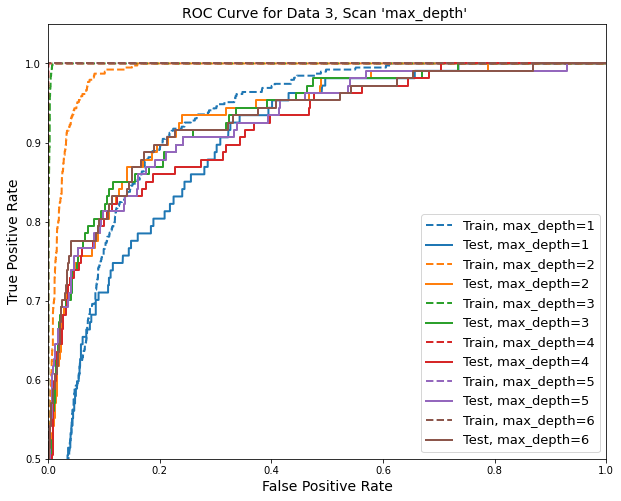

In [19]:
#Scan max_depth

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    #'scale_pos_weight': 4.5
}

scanParam = 'max_depth'

scanList = [1, 2, 3, 4, 5, 6]

scan_xgb_overlay2(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList)

In [ ]:
`

In [82]:
def scan_xgb_overlay3(dataNumber, X_tr, y_tr, X_te, y_te, xgbParams, scanParam, scanList, weights=0, plot=1, save=0):

    """
    This is a function to scan over XGBClassifier parameters. 
    It creates one figures /ROC curve overlaying training and testing results for all scanned values.
    Returns to a table of listing evaluation metrics.
    
    dataNumber: # for Data file in use (1, 2, 3, 4, 5)
    X_tr: training data
    y_tr: training labels
    X_te: testing data
    y_te: testinglabels
    xgbParams: XGBClassifier parameters used to create the model
    scanParam: the XGBClassifier parameter, which will be scanned
    scanList: the list of the values to be scanned; any size is OK.
    weights: Bool parameter to use sample_weights or not.
    plot: Bool parameter to control creating the plot
    save: Bool parameter to control saving the plot
    """
    
    fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    #cp = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
    cp = sns.color_palette()
    
    model_scores_list = []
    
    weigths_train = None
    
    if weights:
        print('Sample weights are used!\n--------\n')
        weigths_train = class_weight.compute_sample_weight(class_weight='balanced', y=y_tr)
    
    for i,s in enumerate(scanList):
        
        xgbParams[scanParam]=s
        
        clf = XGBClassifier(**xgbParams) 
        clf.fit(X_tr, y_tr, sample_weight=weigths_train)
    
        y_train_pred = clf.predict(X_tr)   
        y_train_prob = clf.predict_proba(X_tr) #Probability estimates for each class
        fpr_train, tpr_train, thresholds_train = roc_curve(y_tr, y_train_prob[:,1])
        auc_train = round(auc(fpr_train, tpr_train),3)
        f1_train = round(f1_score(y_tr, y_train_pred),3)
        recall_train = round(recall_score(y_tr, y_train_pred),3)
        precision_train = round(precision_score(y_tr, y_train_pred),3)
        accuracy_train = round(accuracy_score(y_tr, y_train_pred),3)
        
        y_test_pred = clf.predict(X_te)
        y_test_prob = clf.predict_proba(X_te) #Probability estimates for each class
        fpr_test, tpr_test, thresholds_test = roc_curve(y_te, y_test_prob[:,1])
        auc_test = round(auc(fpr_test, tpr_test),3)
        f1_test = round(f1_score(y_te, y_test_pred),3)
        recall_test = round(recall_score(y_te, y_test_pred),3)
        precision_test = round(precision_score(y_te, y_test_pred),3)
        accuracy_test = round(accuracy_score(y_te, y_test_pred),3)
       
        prec_diff_sc = (precision_train - precision_test)/precision_test
        rec_diff_sc = (recall_train - recall_test)/recall_test
        f1_diff_sc = (f1_train - f1_test)/f1_test
        acc_diff_sc = (accuracy_train - accuracy_test)/accuracy_test
        auc_diff_sc = (auc_train - auc_test)/auc_test
        #overfit_measure = np.sqrt((1/4)*(prec_diff_sc**2 + rec_diff_sc**2 + f1_diff_sc**2 + acc_diff_sc**2))
        overfit_measure = np.mean([prec_diff_sc, rec_diff_sc, f1_diff_sc, acc_diff_sc])
        
        fit_scores_train = {'Params': f'{scanParam}={s}  Train ',
                        'precision': precision_train,
                        'recall': recall_train,
                        'f1': f1_train,
                        'accuracy': accuracy_train,
                        'auc': auc_train,
                        'prec_diff_sc': prec_diff_sc,
                        'rec_diff_sc': rec_diff_sc,
                        'f1_diff_sc': f1_diff_sc,
                        'acc_diff_sc': acc_diff_sc,
                        'auc_diff_sc': auc_diff_sc,
                        'overfit_measure': overfit_measure,
                       }
    
        fit_scores_test = {'Params': f'Test',
                        'accuracy': accuracy_test,
                        'precision': precision_test,
                        'recall': recall_test,
                        'f1': f1_test,
                        'accuracy': accuracy_test,
                        'auc': auc_test,
                        'prec_diff_sc': prec_diff_sc,
                        'rec_diff_sc': rec_diff_sc,
                        'f1_diff_sc': f1_diff_sc,
                        'acc_diff_sc': acc_diff_sc,
                        'auc_diff_sc': auc_diff_sc,
                        'overfit_measure': overfit_measure,
                       }
    
        model_scores_list.append(fit_scores_train)
        model_scores_list.append(fit_scores_test)
    
        if plot:
            ax.plot(fpr_train, tpr_train, lw=2, color=cp[i], linestyle='dashed', label=f"Train, {scanParam}={s}")
            ax.plot(fpr_test, tpr_test, lw=2, color=cp[i], label=f"Test, {scanParam}={s}")  


    model_scores_df = pd.DataFrame(model_scores_list)
    model_scores_df = model_scores_df.set_index('Params')
    #print(model_scores_df)
            
    if plot:    
        #ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlabel('False Positive Rate', fontsize=14)
        ax.set_ylabel('True Positive Rate', fontsize=14)
        ax.set_title(f"ROC Curve for Data {dataNumber}, Scan '{scanParam}' ", fontsize=14)
        ax.legend(loc='auto', fontsize=14)
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.5, 1.05])
        
        
    if plot:
        select_row_train = [i*2 for i in range(0, len(scanList))]
        select_row_test = [i*2+1 for i in range(0, len(scanList))]
        prec_train_list = model_scores_df['precision'].iloc[select_row_train]
        prec_test_list = model_scores_df['precision'].iloc[select_row_test]
        f1_train_list = model_scores_df['f1'].iloc[select_row_train]
        f1_test_list = model_scores_df['f1'].iloc[select_row_test]
        rec_train_list = model_scores_df['recall'].iloc[select_row_train]
        rec_test_list = model_scores_df['recall'].iloc[select_row_test]
        acc_train_list = model_scores_df['accuracy'].iloc[select_row_train]
        acc_test_list = model_scores_df['accuracy'].iloc[select_row_test]
        ax2.plot(scanList, prec_train_list, 'ro--', label="Precision Train")
        ax2.plot(scanList, prec_test_list, 'ro-', label="Precision Test")
        ax2.plot(scanList, f1_train_list, 'go--', label="F1-score Train")
        ax2.plot(scanList, f1_test_list, 'go-', label="F1-score Test")
        ax2.plot(scanList, rec_train_list, 'yo--', label="Recall Train")
        ax2.plot(scanList, rec_test_list, 'yo-', label="Recall Test")
        ax2.plot(scanList, acc_train_list, 'bo--', label="Accuracy Train")
        ax2.plot(scanList, acc_test_list, 'bo-', label="Accuracy Test")
        ax2.set_xlabel(scanParam, fontsize=14)
        ax2.set_ylabel('Metric Value', fontsize=14)
        ax2.set_title(f"Evaluation Metrics for Data {dataNumber}, Scan '{scanParam}' ", fontsize=14)
        ax2.legend(loc='auto', fontsize=14)
        ax2.set_ylim([0, 1.05])
    
    
    if save and plot:
        plt.savefig(f'figures/ROC_Curve_d{dataNumber}_{scanParam}_overlay.png')

    return model_scores_df
        

,precision,recall,f1,accuracy,auc,prec_diff_sc,rec_diff_sc,f1_diff_sc,acc_diff_sc,auc_diff_sc,overfit_measure
Params,,,,,,,,,,,
max_depth=1 Train,0.779,0.137,0.232,0.958,0.907,-0.047677,-0.184524,-0.168459,0.002092,0.014541,-0.099642
Test,0.818,0.168,0.279,0.956,0.894,-0.047677,-0.184524,-0.168459,0.002092,0.014541,-0.099642
max_depth=2 Train,0.979,0.479,0.644,0.975,0.981,0.161329,0.191542,0.183824,0.009317,0.066304,0.136503
Test,0.843,0.402,0.544,0.966,0.920,0.161329,0.191542,0.183824,0.009317,0.066304,0.136503
max_depth=3 Train,0.997,0.763,0.864,0.989,0.999,0.130385,0.812352,0.515789,0.021694,0.075350,0.370055
Test,0.882,0.421,0.570,0.968,0.929,0.130385,0.812352,0.515789,0.021694,0.075350,0.370055
max_depth=4 Train,1.000,0.985,0.992,0.999,1.000,0.060445,1.109208,0.587200,0.028836,0.069519,0.446422
Test,0.943,0.467,0.625,0.971,0.935,0.060445,1.109208,0.587200,0.028836,0.069519,0.446422
max_depth=5 Train,1.000,1.000,1.000,1.000,1.000,0.100110,1.141328,0.620746,0.030928,0.075269,0.473278


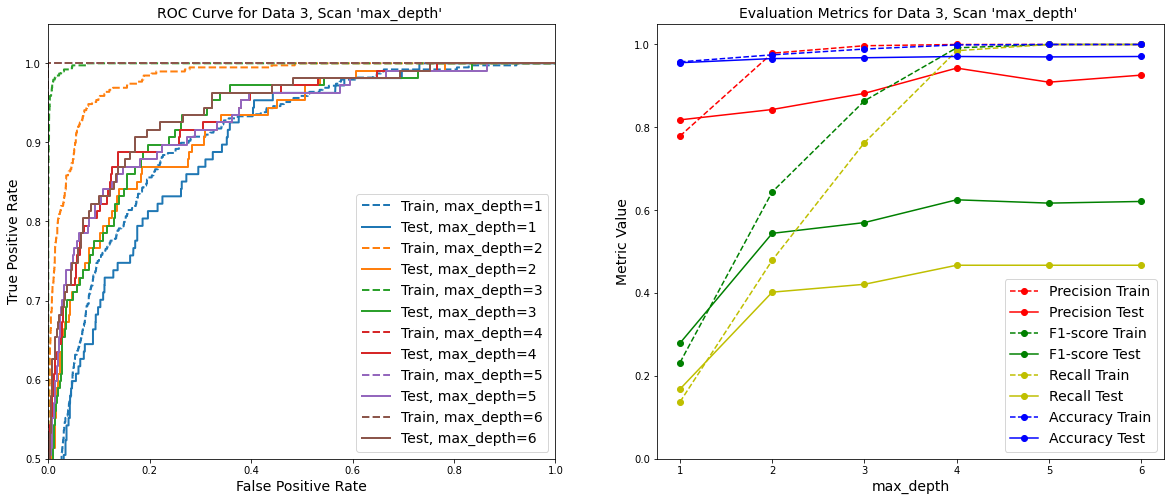

In [85]:
#Scan max_depth

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    #'scale_pos_weight': 4.5
}

scanParam = 'max_depth'

scanList = [1, 2, 3, 4, 5, 6]

scan_xgb_overlay3(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 0, 1, 0)

Sample weights are used!
--------



,precision,recall,f1,accuracy,auc,prec_diff_sc,rec_diff_sc,f1_diff_sc,acc_diff_sc,auc_diff_sc,overfit_measure
Params,,,,,,,,,,,
max_depth=1 Train,0.207,0.848,0.332,0.843,0.922,0.009756,0.080255,0.021538,0.010791,0.026726,0.030585
Test,0.205,0.785,0.325,0.834,0.898,0.009756,0.080255,0.021538,0.010791,0.026726,0.030585
max_depth=2 Train,0.389,0.979,0.557,0.928,0.988,0.127536,0.293263,0.175105,0.015317,0.056684,0.152805
Test,0.345,0.757,0.474,0.914,0.935,0.127536,0.293263,0.175105,0.015317,0.056684,0.152805
max_depth=3 Train,0.716,1.000,0.834,0.982,0.999,0.247387,0.445087,0.330144,0.025052,0.070740,0.261917
Test,0.574,0.692,0.627,0.958,0.933,0.247387,0.445087,0.330144,0.025052,0.070740,0.261917
max_depth=4 Train,0.935,1.000,0.966,0.997,1.000,0.353111,0.647446,0.493045,0.032091,0.086957,0.381423
Test,0.691,0.607,0.647,0.966,0.920,0.353111,0.647446,0.493045,0.032091,0.086957,0.381423
max_depth=5 Train,0.990,1.000,0.995,1.000,1.000,0.174377,0.814882,0.491754,0.028807,0.078749,0.377455


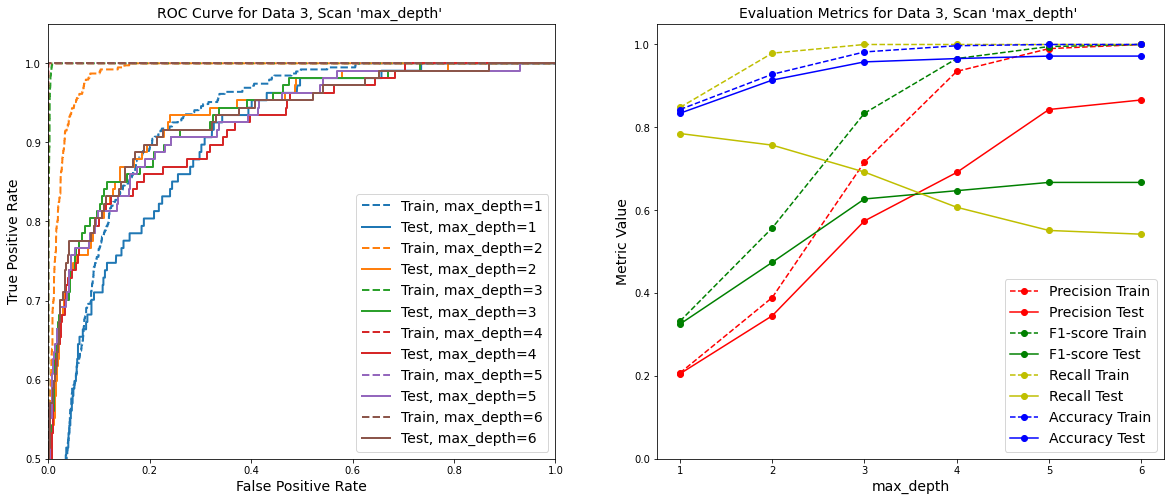

In [86]:
#Scan max_depth

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    #'scale_pos_weight': 4.5
}

scanParam = 'max_depth'

scanList = [1, 2, 3, 4, 5, 6]

scan_xgb_overlay3(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)

,precision,recall,f1,accuracy,auc,prec_diff_sc,rec_diff_sc,f1_diff_sc,acc_diff_sc,auc_diff_sc,overfit_measure
Params,,,,,,,,,,,
max_depth=1 Train,0.485,0.454,0.469,0.953,0.916,0.049784,0.011136,0.030769,0.008466,0.020045,0.025039
Test,0.462,0.449,0.455,0.945,0.898,0.049784,0.011136,0.030769,0.008466,0.020045,0.025039
max_depth=2 Train,0.746,0.755,0.750,0.977,0.987,0.174803,0.324561,0.247920,0.016649,0.054487,0.190984
Test,0.635,0.570,0.601,0.961,0.936,0.174803,0.324561,0.247920,0.016649,0.054487,0.190984
max_depth=3 Train,0.936,0.979,0.957,0.996,1.000,0.231579,0.836773,0.528754,0.028926,0.074114,0.406508
Test,0.760,0.533,0.626,0.968,0.931,0.231579,0.836773,0.528754,0.028926,0.074114,0.406508
max_depth=4 Train,0.992,1.000,0.996,1.000,1.000,0.203883,0.912046,0.556250,0.030928,0.068376,0.425777
Test,0.824,0.523,0.640,0.970,0.936,0.203883,0.912046,0.556250,0.030928,0.068376,0.425777
max_depth=5 Train,1.000,1.000,1.000,1.000,1.000,0.196172,0.912046,0.552795,0.030928,0.061571,0.422985


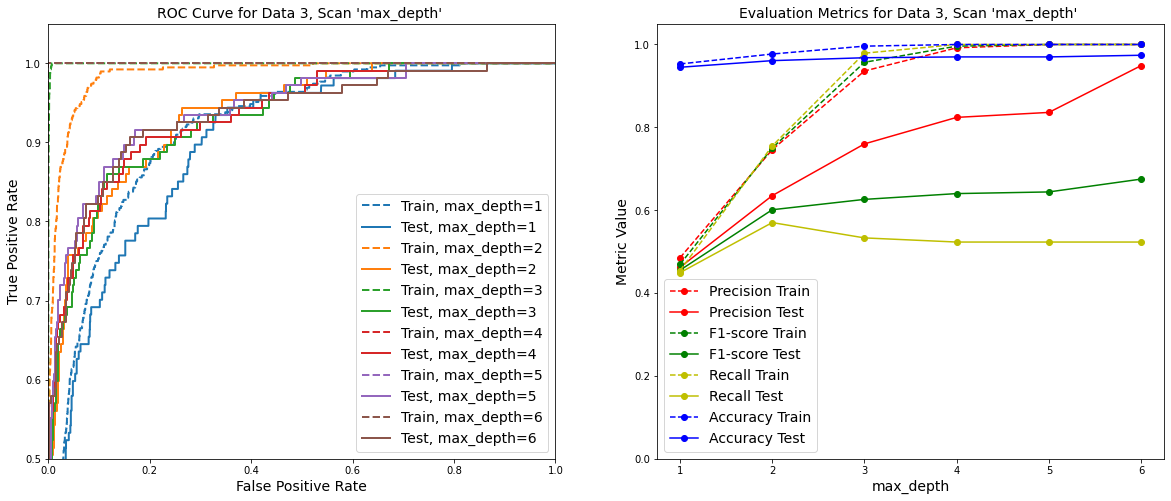

In [87]:
#Scan max_depth

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5
}

scanParam = 'max_depth'

scanList = [1, 2, 3, 4, 5, 6]

scan_xgb_overlay3(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 0, 1, 0)

,precision,recall,f1,accuracy,auc,prec_diff_sc,rec_diff_sc,f1_diff_sc,acc_diff_sc,auc_diff_sc,overfit_measure
Params,,,,,,,,,,,
scale_pos_weight=1 Train,1.000,1.000,1.000,1.000,1.000,0.079914,1.141328,0.610306,0.029866,0.062699,0.465353
Test,0.926,0.467,0.621,0.971,0.941,0.079914,1.141328,0.610306,0.029866,0.062699,0.465353
scale_pos_weight=3 Train,1.000,1.000,1.000,1.000,1.000,0.102536,1.183406,0.642036,0.030928,0.069519,0.489726
Test,0.907,0.458,0.609,0.970,0.935,0.102536,1.183406,0.642036,0.030928,0.069519,0.489726
scale_pos_weight=4.5 Train,1.000,1.000,1.000,1.000,1.000,0.053741,0.912046,0.481481,0.026694,0.069519,0.368491
Test,0.949,0.523,0.675,0.974,0.935,0.053741,0.912046,0.481481,0.026694,0.069519,0.368491
scale_pos_weight=6 Train,1.000,1.000,1.000,1.000,1.000,0.113586,1.020202,0.564945,0.029866,0.068376,0.432150
Test,0.898,0.495,0.639,0.971,0.936,0.113586,1.020202,0.564945,0.029866,0.068376,0.432150
scale_pos_weight=10 Train,1.000,1.000,1.000,1.000,1.000,0.133787,0.782531,0.457726,0.026694,0.086957,0.350185


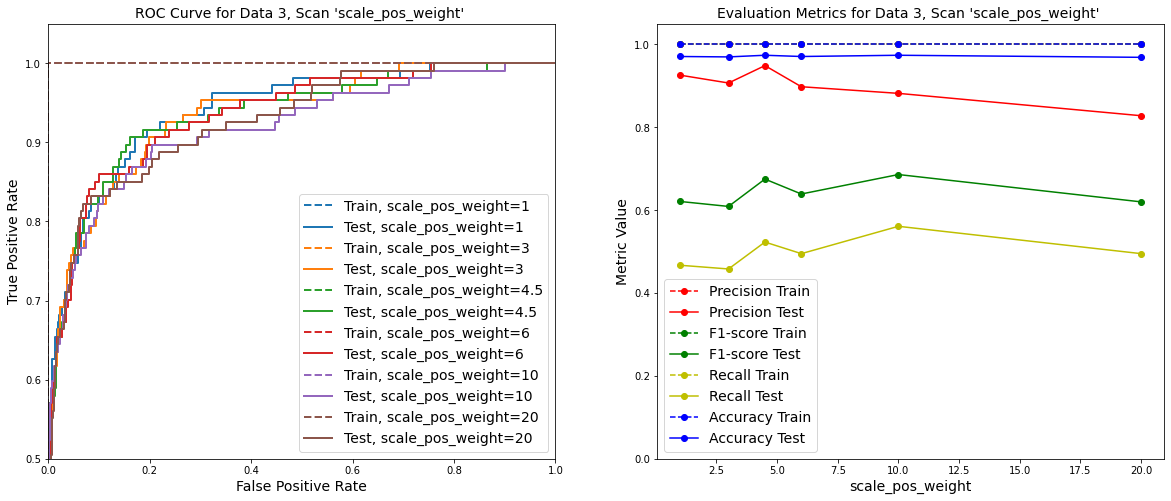

In [89]:
#Scan scale_pos_weight

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
}

scanParam = 'scale_pos_weight'

scanList = [1, 3, 4.5, 6, 10, 20]

scan_xgb_overlay3(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 0, 1, 0)

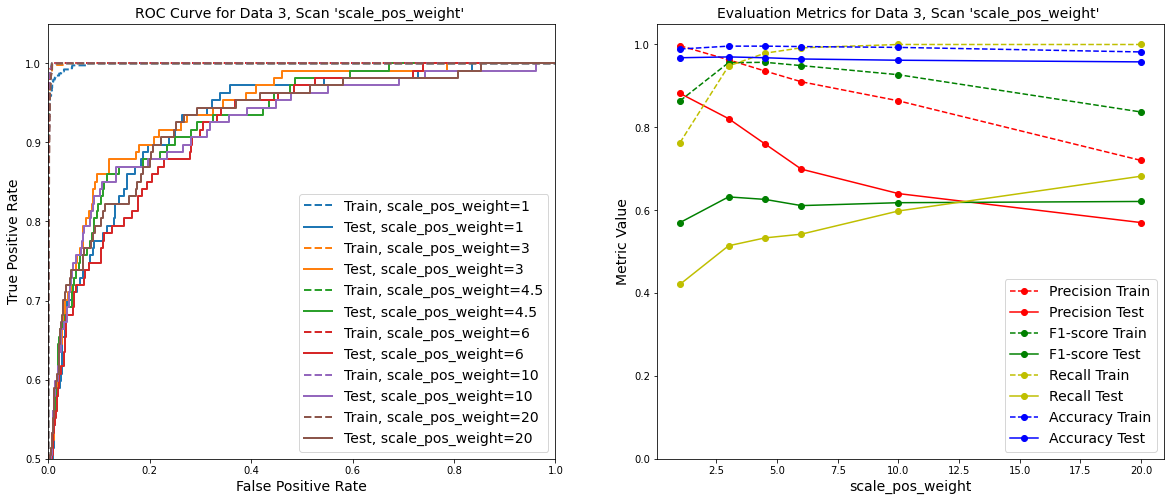

In [102]:
#Scan scale_pos_weight

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'max_depth': 3
}

scanParam = 'scale_pos_weight'

scanList = [1, 3, 4.5, 6, 10, 20]

result = scan_xgb_overlay3(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 0, 1, 0)

In [103]:
result

,precision,recall,f1,accuracy,auc,prec_diff_sc,rec_diff_sc,f1_diff_sc,acc_diff_sc,auc_diff_sc,overfit_measure
Params,,,,,,,,,,,
scale_pos_weight=1 Train,0.997,0.763,0.864,0.989,0.999,0.130385,0.812352,0.515789,0.021694,0.075350,0.370055
Test,0.882,0.421,0.570,0.968,0.929,0.130385,0.812352,0.515789,0.021694,0.075350,0.370055
scale_pos_weight=3 Train,0.963,0.948,0.956,0.996,1.000,0.172960,0.844358,0.512658,0.026804,0.062699,0.389195
Test,0.821,0.514,0.632,0.970,0.941,0.172960,0.844358,0.512658,0.026804,0.062699,0.389195
scale_pos_weight=4.5 Train,0.936,0.979,0.957,0.996,1.000,0.231579,0.836773,0.528754,0.028926,0.074114,0.406508
Test,0.760,0.533,0.626,0.968,0.931,0.231579,0.836773,0.528754,0.028926,0.074114,0.406508
scale_pos_weight=6 Train,0.910,0.992,0.949,0.995,1.000,0.301860,0.830258,0.553191,0.031088,0.086957,0.429099
Test,0.699,0.542,0.611,0.965,0.920,0.301860,0.830258,0.553191,0.031088,0.086957,0.429099
scale_pos_weight=10 Train,0.864,1.000,0.927,0.993,1.000,0.350000,0.672241,0.500000,0.032225,0.081081,0.388616


In [111]:
data1 = arff.loadarff('data/1year.arff')
df1 = pd.DataFrame(data1[0])

# Change label/class  type
df1['class'] = df1['class'].astype('int64')

val_counts = df1['class'].value_counts()
ratio_imbalance = val_counts[0]/val_counts[1]
sqrt_ratio_imbalance = np.sqrt(val_counts[0]/val_counts[1])

print('imbalance ratio:', ratio_imbalance)
print('sqrt of imbalance ratio:', sqrt_ratio_imbalance)

imbalance ratio: 24.929889298892988
sqrt of imbalance ratio: 4.9929840074741865


In [114]:
data2 = arff.loadarff('data/2year.arff')
df2 = pd.DataFrame(data2[0])

# Change label/class  type
df2['class'] = df2['class'].astype('int64')

val_counts = df2['class'].value_counts()
ratio_imbalance = val_counts[0]/val_counts[1]
sqrt_ratio_imbalance = np.sqrt(val_counts[0]/val_counts[1])

print('imbalance ratio:', ratio_imbalance)
print('sqrt of imbalance ratio:', sqrt_ratio_imbalance)

imbalance ratio: 24.4325
sqrt of imbalance ratio: 4.9429242357131065


In [115]:
data3 = arff.loadarff('data/3year.arff')
df3 = pd.DataFrame(data3[0])

# Change label/class  type
df3['class'] = df3['class'].astype('int64')

val_counts = df3['class'].value_counts()
ratio_imbalance = val_counts[0]/val_counts[1]
sqrt_ratio_imbalance = np.sqrt(val_counts[0]/val_counts[1])

print('imbalance ratio:', ratio_imbalance)
print('sqrt of imbalance ratio:', sqrt_ratio_imbalance)

imbalance ratio: 20.21818181818182
sqrt of imbalance ratio: 4.496463256625347


In [116]:
data4 = arff.loadarff('data/4year.arff')
df4 = pd.DataFrame(data4[0])

# Change label/class  type
df4['class'] = df4['class'].astype('int64')

val_counts = df4['class'].value_counts()
ratio_imbalance = val_counts[0]/val_counts[1]
sqrt_ratio_imbalance = np.sqrt(val_counts[0]/val_counts[1])

print('imbalance ratio:', ratio_imbalance)
print('sqrt of imbalance ratio:', sqrt_ratio_imbalance)

imbalance ratio: 18.01359223300971
sqrt of imbalance ratio: 4.244242244854752


In [117]:
data5 = arff.loadarff('data/5year.arff')
df5 = pd.DataFrame(data5[0])

# Change label/class  type
df5['class'] = df5['class'].astype('int64')

val_counts = df5['class'].value_counts()
ratio_imbalance = val_counts[0]/val_counts[1]
sqrt_ratio_imbalance = np.sqrt(val_counts[0]/val_counts[1])

print('imbalance ratio:', ratio_imbalance)
print('sqrt of imbalance ratio:', sqrt_ratio_imbalance)

imbalance ratio: 13.414634146341463
sqrt of imbalance ratio: 3.6625993701661477
